<a href="https://colab.research.google.com/github/Chanwoo18/Deeplearning_Practice/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install fastai

In [ ]:
# pip install fastbook

In [ ]:
import fastbook
from fastai.vision.all import *

전달받은 DataLoader 객체를 학습용과 검증용으로 나누어 저장하는 클래스

In [ ]:
class DataLoaders(GetAttr):
  def __init__(self,*loaders):self.loaders = loaders
  def __getitem__(self,i): return self.loaders[i]
  train,valid = add_props(lambda i, self:self[i])

fastai가 제공하는 DataBlock으로 데이터셋 만들기

In [ ]:
clothes = DataBlock(blocks=(ImageBlock,CategoryBlock),
                    get_items=get_image_files,splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=parent_label,
                    item_tfms=Resize(128))

In [ ]:
path = '/content/drive/MyDrive/img_crawling'

In [ ]:
fns = get_image_files(path)
fns

(#540) [Path('/content/drive/MyDrive/img_crawling/padded_jacket/4.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/1.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/0.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/5.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/2.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/3.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/10.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/9.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/11.jpg'),Path('/content/drive/MyDrive/img_crawling/padded_jacket/8.jpg')...]

In [ ]:
dls=clothes.dataloaders(path)

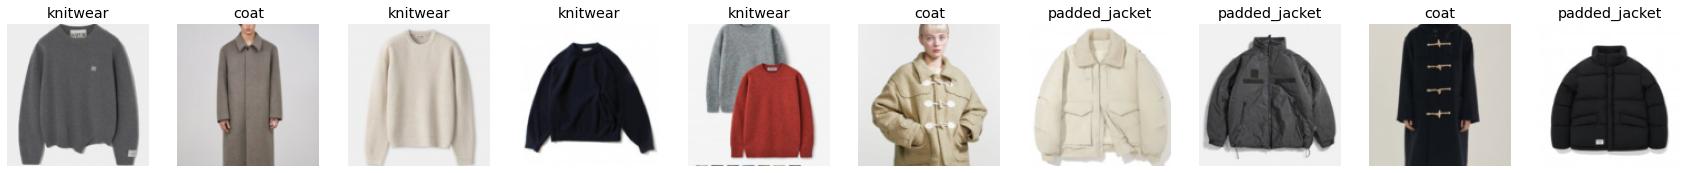

In [ ]:
dls.valid.show_batch(max_n=10, nrows=1)

이미지를 늘리고 빈곳을 0(검정색)으로 채우기

---

불필요한 공간을 만들어 내어 모델의 계산 처리에 큰 낭비가 발생하고유효해상도가 낮아지는 결과를 초래

---



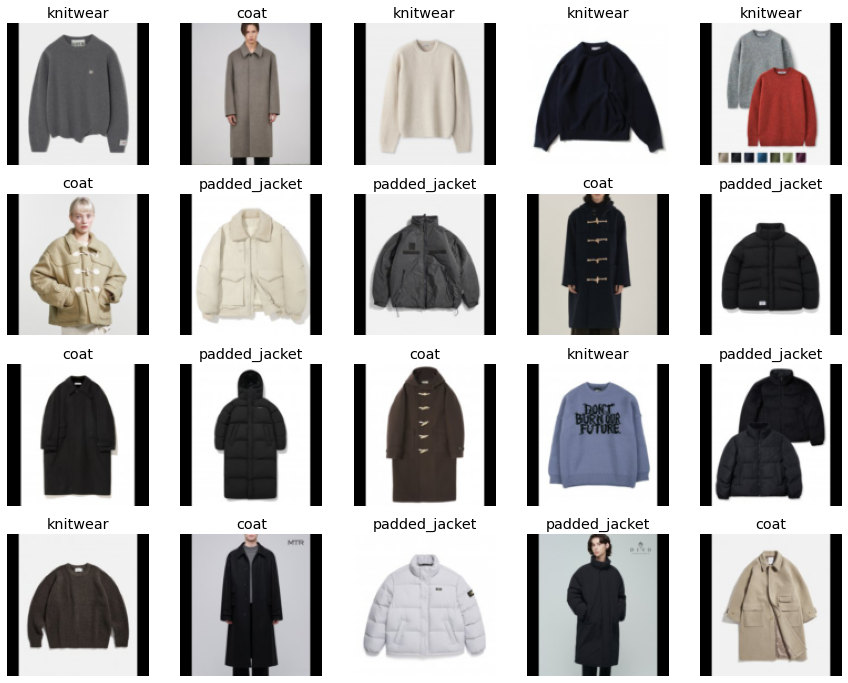

In [ ]:
clothes = clothes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = clothes.dataloaders(path)
dls.valid.show_batch(max_n=20, nrows=4)

동일 이미지에 반복해서 적용되는 RandomResizedCrop 변형이 만드는 이미지

---
왜 바뀐게 없지?

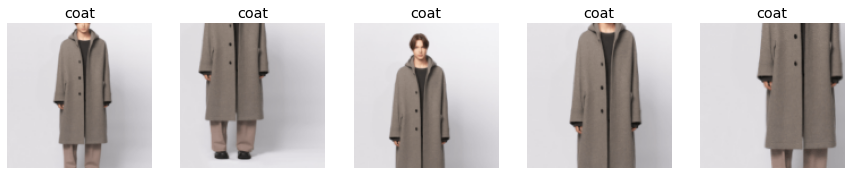

In [ ]:
clothes = clothes.new(item_tfms=RandomResizedCrop(128, min_scale=0.2))
dls = clothes.dataloaders(path)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

aug_transforms 함수에 mult값을 넣어 기본값보다 두배로 조정된 데이터 증강 적용

---

인데 왜 바뀐게 없지?

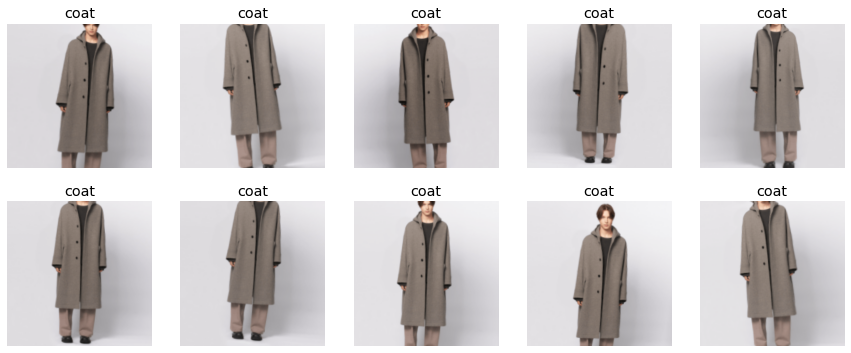

In [ ]:
clothes = clothes.new(item_tfms=Resize(256), batch_tfms=aug_transforms(mult=0.5))
dls = clothes.dataloaders(path)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

In [ ]:
clothes = clothes.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),
                      batch_tfms=aug_transforms())
dls = clothes.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.149554,0.402127,0.111111,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.533761,0.237153,0.101852,00:03
1,0.423040,0.264148,0.055556,00:03
2,0.371035,0.380771,0.074074,00:03
3,0.317026,0.392327,0.083333,00:02


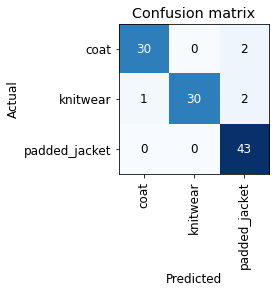

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

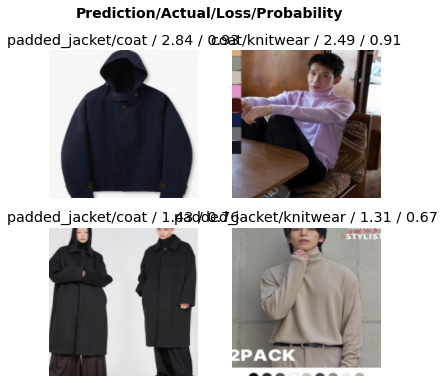

In [ ]:
interp.plot_top_losses(4, nrows=2)

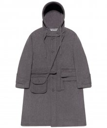

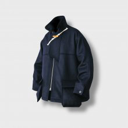

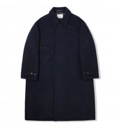

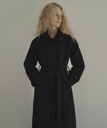

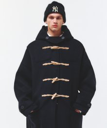

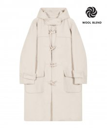

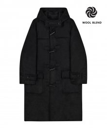

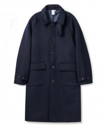

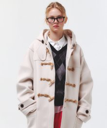

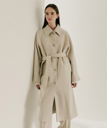

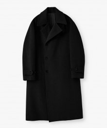

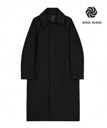

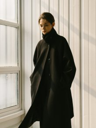

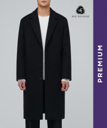

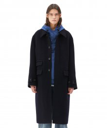

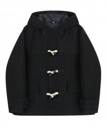

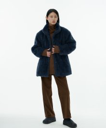

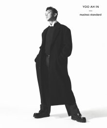

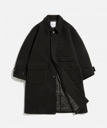

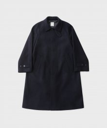

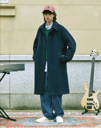

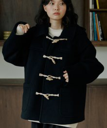

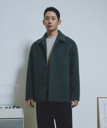

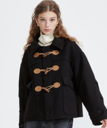

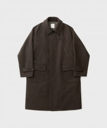

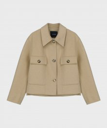

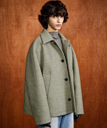

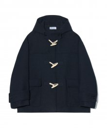

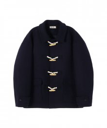

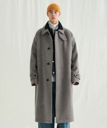

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.export()

In [ ]:
path = Path()

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/drive/MyDrive/img_crawling/coat/32.jpg')

('coat', TensorBase(0), TensorBase([9.9986e-01, 7.8153e-05, 5.6968e-05]))

각각 tensor(0, 1, 2) --> 위의 tensorBase(0) 는 coat!

In [ ]:
learn_inf.dls.vocab

['coat', 'knitwear', 'padded_jacket']

In [ ]:
import ipywidgets as widgets

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img

IndexError: ignored

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

코트로 예측됨

In [ ]:
learn_inf.predict(img)

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred};  probability:{probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description = 'Classify')
btn_run

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred};  probability:{probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
from ipywidgets import VBox

In [ ]:
VBox([widgets.Label('select your clothes'),btn_upload, btn_run, out_pl, lbl_pred])